In [107]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import pylab as plt
from scipy.interpolate import griddata
from PIL import Image

from data_tools import *

np.random.seed(9999)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
# load a test image
f = load_multilayer_tiff('/Users/pekalmj1/Data/ISBI-2012/train-volume.tif')
print(f.shape)
X = f[0,0, ...]
n = X.shape[0]
print(n)

(30, 1, 512, 512)
512


In [112]:
# create and apply a displacement mesh
omega_xnew, omega_ynew = make_displacement_mesh(n) 

X_new = apply_displacement_mesh(X, omega_xnew, omega_ynew)
print(X_new.shape)

# the following variables are just to facilitate plotting
omega_x, omega_y = np.meshgrid(np.arange(n), np.arange(n))
omega_dx = omega_x - omega_xnew
omega_dy = omega_y - omega_ynew

(512, 512)


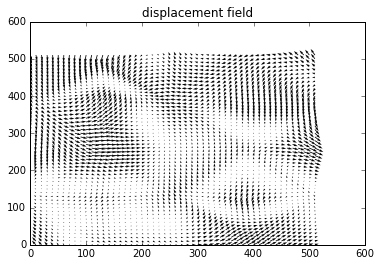

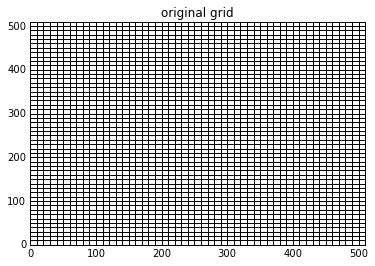

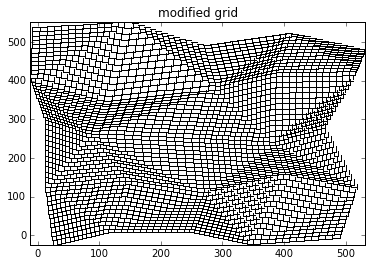

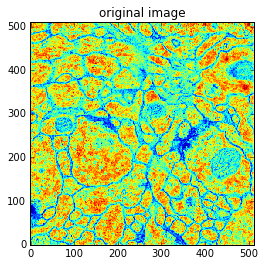

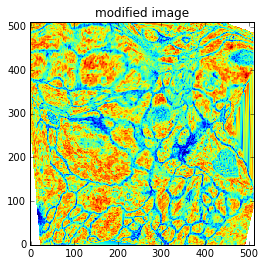

In [113]:
# visualize
subset = lambda M,d:  M[0:512:d, 0:512:d]

plt.quiver(subset(omega_x,10), subset(omega_y,10), subset(omega_dx,10), subset(omega_dy,10))
plt.title('displacement field')

plt.figure()
draw_mesh(subset(omega_x,10), subset(omega_y,10))
plt.title('original grid')

plt.figure()
draw_mesh(subset(omega_xnew,10), subset(omega_ynew,10), 'r-')
plt.title('modified grid')

plt.figure()
plt.imshow(X, interpolation='none')
plt.gca().invert_yaxis()
plt.title('original image')

plt.figure()
plt.imshow(X_new, interpolation='none')
plt.gca().invert_yaxis()
plt.title('modified image')